# Decision Trees

In this notebook, let us look at [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning) using python `sklearn` module. Like other machine learning algorithms, *Decision Trees* can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets. 

# Training and Visualizing a Decision Tree

To understand Decision Trees, let's build one and take a look at how it makes predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Plot properties.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.titlesize'] = 20

In [3]:
# Load data
iris = datasets.load_iris()

In [4]:
# Lets look at the dataframe.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Use features petal length and width ONLY.
X = iris.data[:, 2:]
y = iris.target

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Fit a model.
trainer = DecisionTreeClassifier(max_depth=2)
trainer.fit(X,y)

DecisionTreeClassifier(max_depth=2)

Visualize the trained Decision Tree by first using the `export_graphviz()` method to output a graph definition file called **iris_tree.dot**.

[Text(186.0, 251.66666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(93.0, 151.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(279.0, 151.0, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(186.0, 50.333333333333314, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(372.0, 50.333333333333314, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

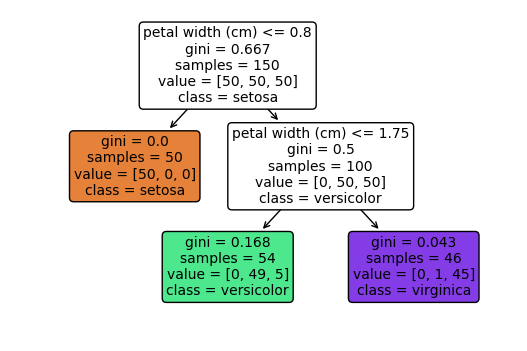

In [8]:
from sklearn import tree # sklearn-version >= 0.21

tree.plot_tree(trainer, max_depth=2, 
                   feature_names=iris.feature_names[2:],
                   class_names=iris.target_names,
                   rounded=True,
                   filled=True)

TODO: Add code cell using `export_graphviz'.

## Making predictions

For prediction, we start at the *root node* (depth=0, at the top): this node asks whether the flower's petal length is smaller than 2.45 cm. If it is, then you move down to the root's left child node (depth=1,left). In this case, it is a *leaf node*, so it directly predicts the class as `setosa`. Otherwise, you travel the root's right child (depth=1,right). This node asks whether the petal width is <= 1.75 cm. If the answer is *yes*, the classifier predicts `versicolor` as predicted class, else it predicts `virginica` as the predicted class.

Some advantages of *Decision Trees* are as follows:
- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- Able to handle both numerical and categorical data.
- Possible to validate a model using statistical tests. 


Some disadvantages of *Decision Trees* are as follows:
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

A tree-node's *samples* attribute counts how many training instances it applies to. Its *value* attribute tells how many training instances of each class this node applies to. Finally, the *gini* attribute meatures its *impurity*, a node is **"pure"** if all training instances it applies to belong to the same class. 

The goal of their learning algorithms is always to find the best split for each node of the tree. The goodness of a split is measured by the *gini impurity* score. Formally, a *gini impurity* score is defined as:

$$
G_i = 1 - \underset{k}\sum p_{ik}^{2}
$$

where $p_{ik}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ tree-node.

For the root node (depth=0), the *gini impurity* measure can be computed as follows: (assume `setosa` = 1,`versicolor` = 2, `virginica` = 3)

$$
\begin{align*}
& p_{0,1} = p_{0,2} = p_{0,3}  = \frac{50}{150} \\
\implies G_0 &= 1 - \left({\frac{50}{150}}\right)^2 - \left({\frac{50}{150}}\right)^2 - \left({\frac{50}{150}}\right)^2 \\
\implies &= 1 - \left({\frac{50}{150}} \right)^2 \times 3 \\
\implies &= 1 - \frac{1}{3} = \frac{2}{3} = 0.667
\end{align*}
$$

Apart from *gini impurity*, you can also choose *entropy impurity* by setting the `criterion` argument to `'entropy'`. The entropy measure at node $i$ is defined as:

$$
H_i = - \underset{k}\sum p_{ik} log\left( p_{ik} \right), \; \; p_{ik} \neq 0
$$

<div class="alert alert-block alert-success">
    <b> EXCERCISE: </b>
    
   <ul>
    <li> Measure analytically the entropy impurity at all leaf nodes. </li>
    <li> Change the <tt>criterion</tt> parameter in <tt>DecisionTreeClassifier</tt> to entropy. Plot the tree. Now, check if your answers match with the computed impurities. </li>
   </ul>
</div>

In [9]:
# Step size in the mesh. For visualization purpose.
stepSize = .1

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))

In [10]:
Z = trainer.predict(np.c_[xx.ravel(), yy.ravel()])

In [11]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'darkblue'])

Text(0.5, 1.0, '3-Class Classification using a DecisionTreeClassifer with max_depth:2')

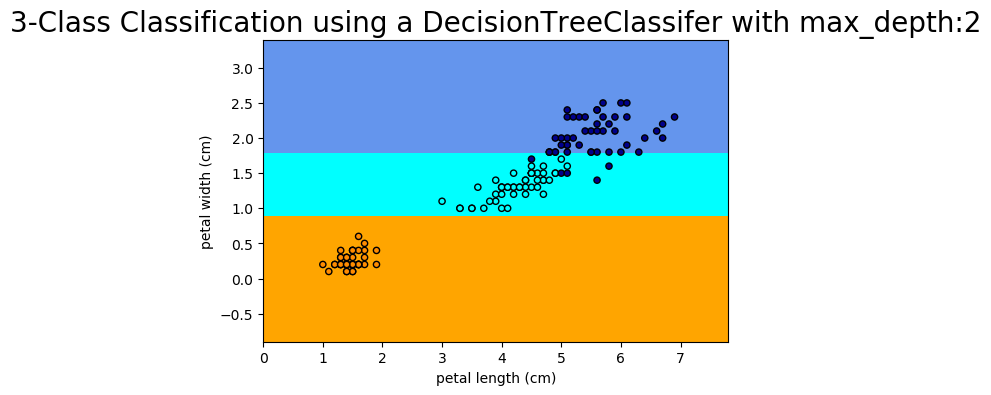

In [12]:
# Put the decision boundary into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Next, add the training points.
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k',s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'3-Class Classification using a DecisionTreeClassifer with max_depth:2')

## Estimating Class Probabilities

A *Decision Tree* can also estimate the probability that an instance beongs to particular class $k$: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class $k$ in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the *Decision Tree* should output the following probabilities: 0% for `setosa` (0/54), 90.7% for `versicolor`(49/54) and 9.3% for `virginica` (5/54). Therefore, the predicted class is `versicolor`.

In [13]:
trainer.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
trainer.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm

`sklearn` uses the *Classification And Regression Tree (CART)* algorithm to train *Decision Trees*. The algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $\theta_k$(like, petal length <= 2.45 cm). How does it choose $k$ and $\theta_k$ ? It searches for the pair($k,\theta_k$) that produces the *purest subsets* (weighted by their size). The cost function that the algorithm tries to minimize is as follows:

$$
J(k,\theta_k) = \dfrac{n_l}{n} G_l + \dfrac{n_r}{n} G_r
$$

where, $G_l,G_r$ measures the *gini impurities* of left/right subsets, $n_l,n_r$ is the number of instances in left/right subsets.

Once it has successfully split the training set in two, it splits the subsets using the same logic, and so on recursively. The algorithm terminates once it has reached the maximum depth (defined by the `max_depth` parameter), or if it cannot find a split that will reduce impurity. 

<div class="alert alert-block alert-warning">
    <b> NOTE: </b>
   
<p> The CART algorithm is a <font color="red">greedy algorithm</font>, it greedily searches for an optimum split at the top level, the repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm produces a reasonably good solution, but it is not guaranteed to be the optimal solution.
</p>
    </div>

## Pruning a Tree

To avoid *overfitting* the training data, it is imperative to restrict the *Decision Tree's* freedom during the training. This is also known as **regularization** in machine learning. In `sklearn`, you can control the height of the tree using `max_depth` parameter. Reducing this value will result in a short tree and hence avoid overfitting.

Apart from `max_depth`, there are certain other parameters as well that help to reduce *overfitting*.
- `min_samples_split`- the min number of samples a node must have before it can be split.
- `min_samples_leaf` - the min number of sampels a leaf node must have.
- `min_weight_fraction_leaf` - min_samples_leaf over the total number of weighted instances.
- `max_leaf_nodes`- the max number of leaf nodes.
- `max_features` - the max number of features that are evaluated for splitting at each node.

**Increasing *min* parameters or reducing *max* parameters will regularize the model**.

## Train a DecisionTreeClassifier on adult data

Load a pre-cleaned data from `train_adult.pkl` and `test_adult.pkl` files. If you are reusing same train and test datasets for different algorithms, you can just pre-process the dataset **once** and re-use it for all algorithms. In this case, I've stored the pre-processed data in the **Naïve Bayes Classifier** notebook.

In [15]:
# load a pre-cleaned training data. Look at 'Naïve Bayes Classifier' notebook for preprocessing.
import pickle

with open('../data/train_adult.pkl','rb') as f:
    train_data = pickle.load(f)
    X_train = train_data['X']
    y_train = train_data['y']

In [16]:
# load a pre-cleaned test data.

with open('../data/test_adult.pkl', 'rb') as f:
    test_data = pickle.load(f)
    X_test = test_data['X']
    y_test = test_data['y']

Check the datasets.

In [17]:
X_train.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,ID,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.649359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.886948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.130124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.131533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,ID,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
0,0.051948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.193259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.415584,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.065147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.415584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.068370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.467532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.451461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Finding a best tree depth with KFold Cross Validation

As we discussed above, for training a *DecisionTreeClassifier* model on real data, we have to find a suitable depth of the tree. A good way to find the best value for this parameter is just iterating through all the possible depths and measure the accuracy with [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

<img src="../data/k-fold-cv.png"> </img>

*Cross Validation* is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different train and test datasets, which allows the model to be trained and validated on different data at each iteration. The disadvantage of such an approach is that the model has to be trained and validated on each fold, and therefore this method is computationally expensive.

The simplest way to use cross-validation is to call `sklearn.model_selection.cross_val_score` helper function on the estimator and the dataset.

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

The following code we see how Cross validation is used to split the training data, fit a model and computing the score with each fold. When the `cv` parameter is specified as an integer, `cross_val_score` uses **KFold** strategies by default. 

[KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) divides all the samples in $k$ groups of samples. The prediction function is learned using $k-1$ folds, and the fold left out is used for test. **See figure above.**

In [20]:
%%time
n_fold = 5
max_depth_range = range(1,15)
accuracies = []

for depth in max_depth_range:
    trainer = DecisionTreeClassifier(max_depth=depth)
    
    scores = cross_val_score(trainer, X_train, y_train, cv=n_fold)
    accuracies.append(sum(scores) / len(scores))
    print(depth, scores, f'mean score: {sum(scores) / len(scores):.4f}')

1 [0.7600351  0.7600351  0.76020184 0.76020184 0.75998245] mean score: 0.7601
2 [0.83044527 0.831542   0.82799473 0.83194384 0.82492321] mean score: 0.8294
3 [0.84645756 0.84930906 0.84335235 0.84181659 0.84203598] mean score: 0.8446
4 [0.84623821 0.85237991 0.84269416 0.84181659 0.84203598] mean score: 0.8450
5 [0.85150252 0.86246984 0.8490566  0.84795963 0.84488811] mean score: 0.8512
6 [0.85457337 0.86159245 0.85103115 0.85168934 0.84949539] mean score: 0.8537
7 [0.85347664 0.86225049 0.85037297 0.84949539 0.85234752] mean score: 0.8536
8 [0.84777363 0.86400526 0.85081176 0.85103115 0.85212813] mean score: 0.8531
9 [0.8466769  0.86203115 0.84839842 0.85125055 0.85059237] mean score: 0.8518
10 [0.84579952 0.85435403 0.8490566  0.8453269  0.85015358] mean score: 0.8489
11 [0.84492213 0.8528186  0.84752084 0.84839842 0.85015358] mean score: 0.8488
12 [0.8438254  0.84908971 0.85037297 0.84774024 0.84883721] mean score: 0.8480
13 [0.8409739  0.85018644 0.84642387 0.84093901 0.85015358] m

In [21]:
# Check accuracies
pd.DataFrame({'max_depth': max_depth_range, 'accuracy': accuracies}).head(n=len(accuracies))

,max_depth,accuracy
0,1,0.760091
1,2,0.829370
2,3,0.844594
3,4,0.845033
4,5,0.851175
5,6,0.853676
6,7,0.853589
7,8,0.853150
8,9,0.851790
9,10,0.848938


### Leave One Out (LOO)

`LeaveOneOut` is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Therefore, for $n$ samples, we have $n$ different training sets and $n$ different test sets. 

An example is as follows.

In [22]:
from sklearn.model_selection import LeaveOneOut

In [23]:
X = [i for i in range(5)]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print(f'{train} {test}')

[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]


<div class="alert alert-block alert-success">
    <b> EXCERCISE </b>
    
   <ul>
    <li> Can you find the best Decision Tree model for the above data using LeaveOneOut validation? </li>
    <li> Tune other parameters above and try to come up with a <tt> best model </tt> for this data. What is the best accuracy you can achieve? </li>
    </ul>
</div>

Using KFold, the best `max_depth` parameter appears to be 7 (85.35% mean accuracy). If we increase the depth even more, a drop in accuracy is noticed. Therefore, `max_depth=7` seems to be a good estimate.

In [24]:
# Visualize the best model
trainer = DecisionTreeClassifier(max_depth=7)
trainer.fit(X_train,y_train)

y_pred = trainer.predict(X_test)

print(f'Test accuracy: {accuracy_score(y_test, y_pred):.4f}')

# tree.plot_tree(trainer, max_depth=3, 
#                    feature_names=X_train.columns,
#                    class_names=['>=50k', '<50k'],
#                    rounded=True,
#                    filled=True)

Test accuracy: 0.8383


Plot the confusion matrix.

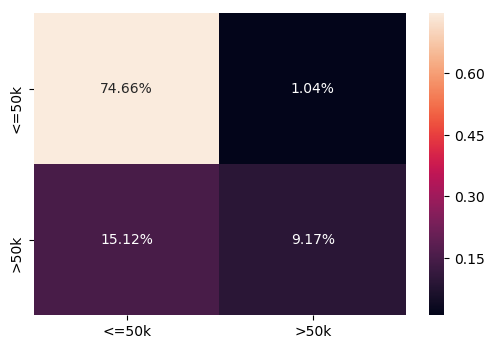

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), fmt='.2%', xticklabels=['<=50k','>50k'], yticklabels=['<=50k','>50k'], annot=True)